In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [ ]:
!pip install xgboost

In [ ]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.9/705.9 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 21.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import os
import regex as re
from gensim.models import Word2Vec, KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import TfidfVectorizer
import mlflow
import mlflow.sklearn
import mlflow.keras
import mlflow.xgboost
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional, BatchNormalization, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# --- 1. LOAD AND PREPROCESS DATA ---
print("Loading and preprocessing data...")
df = pd.read_csv("/root/mlops_projects/FinancialSentiment_prediction/Datasets/Financial_data.csv")

Loading and preprocessing data...


In [ ]:
df.duplicated().sum()

520

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s.]', '', text)  # Remove punctuation
    #text = re.sub(r'\d+', '', text)       # Remove numbers
    return text

In [ ]:
df['Sentence'] = df['Sentence'].apply(clean_text)

In [ ]:
# Split data
X = df['Sentence']
y = df['Sentiment'].map({'positive': 2, 'negative': 1, 'neutral': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
# Show class distribution
print("\nClass Distribution (Training):")
print(y_train.value_counts())
print("\nClass Distribution (Testing):")
print(y_test.value_counts())


Class Distribution (Training):
Sentiment
0    2787
2    1169
1     301
Name: count, dtype: int64

Class Distribution (Testing):
Sentiment
0    697
2    292
1     76
Name: count, dtype: int64


In [ ]:
# --- 2. SETUP EMBEDDINGS ---
print("\nSetting up embeddings...")
glove_input_file = 'Datasets/Embeddings/glove.6B.100d.txt'  # Using 100D embeddings
word2vec_output_file = 'Datasets/Embeddings/glove.6B.100d.word2vec.txt'


Setting up embeddings...


In [ ]:
# Convert GloVe to Word2Vec format if needed
if not os.path.exists(word2vec_output_file):
    print("Converting GloVe to Word2Vec format...")
    glove2word2vec(glove_input_file, word2vec_output_file)

Converting GloVe to Word2Vec format...


/tmp/ipython-input-12-395572714.py:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


In [ ]:
# Convert GloVe to Word2Vec format if needed
if not os.path.exists(word2vec_output_file):
    print("Converting GloVe to Word2Vec format...")
    glove2word2vec(glove_input_file, word2vec_output_file)

In [ ]:
# Load pre-trained GloVe embeddings
print("Loading GloVe embeddings...")
glove_kv = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

Loading GloVe embeddings...


In [ ]:
# Prepare sentences for training
train_sentences = [text.split() for text in X_train]

In [ ]:
# --- 3. INITIALIZE AND FINE-TUNE WORD2VEC MODEL ---
print("\nInitializing and fine-tuning Word2Vec model...")
# Create Word2Vec model
w2v_model = Word2Vec(
    vector_size=100,  # Match GloVe dimension
    window=4,
    min_count=1,
    workers=4,
    epochs=15  # Increased epochs for better fine-tuning
)


Initializing and fine-tuning Word2Vec model...


In [ ]:
# Build vocabulary
w2v_model.build_vocab(train_sentences)

In [ ]:
# Initialize with GloVe vectors
print("Initializing with GloVe vectors...")
for word in w2v_model.wv.index_to_key:
    if word in glove_kv:
        w2v_model.wv[word] = glove_kv[word]

Initializing with GloVe vectors...


In [ ]:
# Fine-tune on our dataset
print("Fine-tuning on domain data...")
w2v_model.train(
    train_sentences,
    total_examples=w2v_model.corpus_count,
    epochs=w2v_model.epochs
)

Fine-tuning on domain data...


(961016, 1244385)

In [ ]:
# --- 4. SETUP TF-IDF WEIGHTING ---
print("\nSetting up TF-IDF vectorizer...")
tfidf = TfidfVectorizer(max_features=20000)
tfidf.fit(X_train)  # Fit on training data only


Setting up TF-IDF vectorizer...


TfidfVectorizer(max_features=20000)

In [ ]:
def get_tfidf_embedding(text, embedding_model, tfidf_vectorizer, dim=100):
    words = text.split()
    vectors = []
    weights = []

    # Check if the model is a Word2Vec model or KeyedVectors
    model_wv = embedding_model.wv if hasattr(embedding_model, 'wv') else embedding_model

    for word in words:
        if word in model_wv and word in tfidf_vectorizer.vocabulary_: # Check if word is in both
            weight = tfidf_vectorizer.idf_[tfidf_vectorizer.vocabulary_[word]]
            vectors.append(model_wv[word])
            weights.append(weight)

    if vectors:
        weights = np.array(weights)
        weights = weights / weights.sum()  # Normalize weights
        return np.average(vectors, axis=0, weights=weights)
    else:
        return np.zeros(dim) # Return zero vector if no words found

In [ ]:
# Create feature matrices with TF-IDF weighting
X_train_glove = np.array([get_tfidf_embedding(text, glove_kv, tfidf) for text in X_train])
X_test_glove = np.array([get_tfidf_embedding(text, glove_kv, tfidf) for text in X_test])

In [ ]:
X_train_w2v = np.array([get_tfidf_embedding(text, w2v_model.wv, tfidf) for text in X_train])
X_test_w2v = np.array([get_tfidf_embedding(text, w2v_model.wv, tfidf) for text in X_test])


In [ ]:
# --- 6. PREPARE DATA FOR LSTM ---
print("\nPreparing data for LSTM model...")
# Tokenization
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Calculate max length (95th percentile)
lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(lengths, 95))
print(f"Using sequence length: {max_len}")

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Create embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))

for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]


Preparing data for LSTM model...
Using sequence length: 37


In [ ]:
# --- 7. HANDLE CLASS IMBALANCE ---
print("\nHandling class imbalance...")
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
class_weight_dict_keras = {i: weight for i, weight in enumerate(class_weights)}

print("Class weights:", class_weight_dict)


Handling class imbalance...
Class weights: {0: 0.5091496232508074, 1: 4.714285714285714, 2: 1.213857998289136}


In [ ]:
# --- 8. DEFINE MODELS ---
models = {
    'Logistic_Regression': LogisticRegression(
        max_iter=1000,
        class_weight=class_weight_dict,
        C=0.1,
        solver='saga',
        random_state=42
    ),
    'Random_Forest': RandomForestClassifier(
        class_weight=class_weight_dict,
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        scale_pos_weight=class_weights[1],  # Focus on minority class
        learning_rate=0.1,
        max_depth=5,
        n_estimators=200,
        random_state=42
    )
}

In [ ]:
mlflow.set_tracking_uri("http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/")

In [ ]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 8.2 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
import os

# Retrieve AWS credentials from Colab Secrets
aws_access_key_id = userdata.get('AWS_ACCESS_KEY_ID')
aws_secret_access_key = userdata.get('AWS_SECRET_ACCESS_KEY')
# Optional: Retrieve default region if you added it
aws_default_region = userdata.get('AWS_DEFAULT_REGION')


# Set them as environment variables
os.environ['AWS_ACCESS_KEY_ID'] = aws_access_key_id
os.environ['AWS_SECRET_ACCESS_KEY'] = aws_secret_access_key
# Optional: Set default region
if aws_default_region:
   os.environ['AWS_DEFAULT_REGION'] = aws_default_region

print("AWS credentials loaded from Colab Secrets and set as environment variables.")

AWS credentials loaded from Colab Secrets and set as environment variables.


In [ ]:
#--- 9. EXPERIMENT TRACKING WITH MLFLOW ---
print("\nStarting MLflow experiment tracking...")
mlflow.set_experiment('Sentiment_Analysis_LSTM_TFIDF')

# Test both embedding types for traditional models
embedding_sets = [
    ('Original_GloVe', X_train_glove, X_test_glove),
    ('FineTuned_Word2Vec', X_train_w2v, X_test_w2v)
]



Starting MLflow experiment tracking...


In [ ]:
# Track traditional models
for emb_name, X_train_emb, X_test_emb in embedding_sets:
    for model_name, model in models.items():
        run_name = f"{model_name}_{emb_name}"
        print(f"\n--- Training {run_name} ---")

        with mlflow.start_run(run_name=run_name):
            # Train model
            model.fit(X_train_emb, y_train)

            # Evaluate
            y_pred = model.predict(X_test_emb)
            f1 = f1_score(y_test, y_pred, average='weighted')
            acc = accuracy_score(y_test, y_pred)

            # Log parameters and metrics
            mlflow.log_params({
                'model': model_name,
                'embedding': emb_name,
                'vector_size': 100,
                'epochs': 15,
                'tfidf_weighting': True
            })
            mlflow.log_metrics({
                'f1_score': f1,
                'accuracy': acc
            })

            # Log model with input example
            input_example = X_test_emb[:1]
            if model_name == 'XGBoost':
                mlflow.xgboost.log_model(model, 'model', input_example=input_example)
            else:
                mlflow.sklearn.log_model(model, 'model', input_example=input_example)

            print(f"{model_name} ({emb_name}) - F1: {f1:.4f}, Accuracy: {acc:.4f}")


--- Training Logistic_Regression_Original_GloVe ---


2025/09/09 13:39:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logistic_Regression (Original_GloVe) - F1: 0.6340, Accuracy: 0.6103
🏃 View run Logistic_Regression_Original_GloVe at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420/runs/500ab6276642484b90000487b67457b3
🧪 View experiment at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420

--- Training Random_Forest_Original_GloVe ---


2025/09/09 13:40:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Random_Forest (Original_GloVe) - F1: 0.6499, Accuracy: 0.6892
🏃 View run Random_Forest_Original_GloVe at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420/runs/6ce6c9dbcd504213b24d36378371bcbd
🧪 View experiment at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420

--- Training XGBoost_Original_GloVe ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
2025/09/09 13:41:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:41:04] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


XGBoost (Original_GloVe) - F1: 0.6725, Accuracy: 0.7117
🏃 View run XGBoost_Original_GloVe at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420/runs/395df9098d4a4003b6f6345d2b8be061
🧪 View experiment at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420

--- Training Logistic_Regression_FineTuned_Word2Vec ---


2025/09/09 13:41:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logistic_Regression (FineTuned_Word2Vec) - F1: 0.6466, Accuracy: 0.6254
🏃 View run Logistic_Regression_FineTuned_Word2Vec at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420/runs/efbb8d236683431aafae24b93ecdb54e
🧪 View experiment at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420

--- Training Random_Forest_FineTuned_Word2Vec ---


2025/09/09 13:41:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Random_Forest (FineTuned_Word2Vec) - F1: 0.6776, Accuracy: 0.7061
🏃 View run Random_Forest_FineTuned_Word2Vec at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420/runs/5e5969c5bb574e8db48d38a9e50be75d
🧪 View experiment at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420

--- Training XGBoost_FineTuned_Word2Vec ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:41:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
2025/09/09 13:42:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:42:04] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


XGBoost (FineTuned_Word2Vec) - F1: 0.6841, Accuracy: 0.7192
🏃 View run XGBoost_FineTuned_Word2Vec at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420/runs/e4b221193e2f4b4a8184932a3bfa9cce
🧪 View experiment at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from mlflow.tracking import MlflowClient
client = MlflowClient()
exp = client.get_experiment_by_name(name="Sentiment_Analysis_LSTM_TFIDF")

# Filter for Logistic Regression + FineTuned_Word2Vec
runs = client.search_runs(experiment_ids=[exp.experiment_id],
                           filter_string="params.model='XGBoost' and params.embedding='FineTuned_Word2Vec'",
                          order_by=["metrics.f1_score DESC"])
best_run = runs[0]
run_id = best_run.info.run_id
print(f"Best run ID:{run_id}")

#loading model
model_uri = f"runs:/{run_id}/model"
loaded_model = mlflow.xgboost.load_model(model_uri)

Best run ID:e4b221193e2f4b4a8184932a3bfa9cce


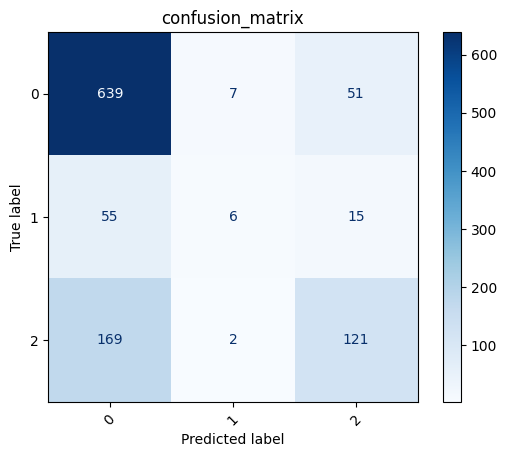


Classification Report:
              precision    recall  f1-score   support

           0     0.7404    0.9168    0.8192       697
           1     0.4000    0.0789    0.1319        76
           2     0.6471    0.4144    0.5052       292

    accuracy                         0.7192      1065
   macro avg     0.5958    0.4700    0.4854      1065
weighted avg     0.6905    0.7192    0.6841      1065



In [ ]:
y_pred = loaded_model.predict(X_test_w2v)

#confusion matrix
cm = confusion_matrix(y_test,y_pred)
labels = sorted(set(y_test))

#Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot(cmap="Blues",xticks_rotation=45)
plt.title("confusion_matrix")
plt.show()

# Optional: Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
# --- 3. Predict on Test Set ---
y_pred = loaded_model.predict(X_test_w2v)

In [ ]:
# --- 4. Build Analysis DataFrame ---
analysis_df = pd.DataFrame({
    "text": X_test,              # <- original text input
    "true_label": y_test,
    "predicted_label": y_pred,
})

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
analysis_df.head()

,text,true_label,predicted_label
247,thus the method will cut working costs and will fasten the planning and building processes .,0,0
1944,of the sales price a sales gain of some 3.1 mln euro 4.5 mln will be recognized in incap s earnings for 2007 .,2,0
4388,finnish beverage company olvi is one of the last listed companies in finland that has not yet published its financial result for the second quarter of 2009 .,0,0
2197,in 2006 452 million tonnes co2 of eua eu allowance emissions credit in eu was traded with an underlying market value approx .,1,0
4225,the acquisition is expected to take place by the end of august 2007 .,0,0


In [ ]:
analysis_df["text_length"] = analysis_df["text"].apply(lambda x: len(x.split()))
analysis_df["correct"] = analysis_df["true_label"] == analysis_df["predicted_label"]

In [ ]:
# --- 5. Accuracy by Sentence Length Bucket ---
bins = [0, 5, 10, 15, 20, 30, 40, 100]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '31-40', '41+']
analysis_df["length_bucket"] = pd.cut(analysis_df["text_length"], bins=bins, labels=labels)

In [ ]:
bucket_accuracy = (
    analysis_df.groupby("length_bucket")["correct"]
    .mean()
    .reset_index()
    .rename(columns={"correct": "accuracy"})
)

/tmp/ipython-input-46-1108284644.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis_df.groupby("length_bucket")["correct"]


/tmp/ipython-input-47-3918263347.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bucket_accuracy, x="length_bucket", y="accuracy", palette="mako")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


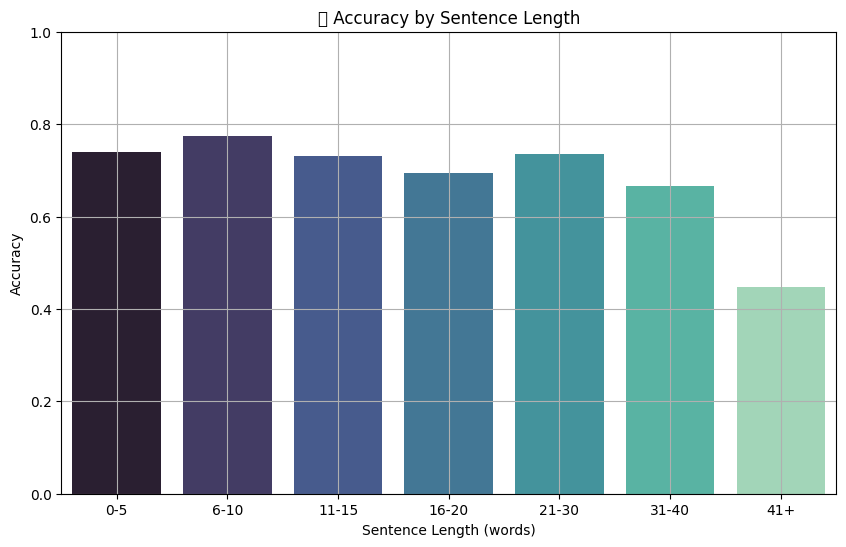

In [ ]:
# --- 6. Plot Accuracy by Sentence Length ---
plt.figure(figsize=(10, 6))
sns.barplot(data=bucket_accuracy, x="length_bucket", y="accuracy", palette="mako")
plt.title("✅ Accuracy by Sentence Length")
plt.xlabel("Sentence Length (words)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [ ]:
# --- 9. View Top Incorrect Predictions (Longest + Shortest) ---
print("\n🔍 Longest Incorrect Predictions:")
display(analysis_df[~analysis_df["correct"]]
        .sort_values("text_length", ascending=False)
        [["text", "text_length", "true_label", "predicted_label"]]
        .head(10))


🔍 Longest Incorrect Predictions:


,text,text_length,true_label,predicted_label
4446,based on the first quarter result existing order backlog and new order prospects the company expects that fullyear sales will contract by 25 from 2008 the gross margin will stay at a healthy level and the operating profit margin will be lower than in 2008 due to lower sales volume .,51,2,0
1667,finnish software and hardware developer elektrobit oyj hel ebg1v or eb said today it will temporarily lay off up to 200 people for a maximum of 90 day in finland aiming to achieve cost savings of eur 1.7 million usd 2m in the second half of 2010 .,48,2,0
267,the plant is scheduled for completion in late february 2007 with hand over of some areas in january two other suppliers of nokia aspocomp group oyj and perlos have announced their plans to establish plants within the nokia complex together they will invest rs 365 crore .,47,2,0
5565,the ebrd is using its own funds to provide a 21.6 mln a loan while the b portion of 10 mln euros has been syndicated to two finnish commercial banks nordea bank finland plc 7.7 mln euros and pohjola bank plc 2.3 mln euros .,45,0,2
2758,navteq has a commanding lead in installed map data systems in north american vehicles and may be the leader in turnbyturn navigation data offered by services such as onstar in north america said analyst phil magney of telematics research group in minnetonka minn. .,44,2,0
2100,26 october 2010 finnish environmental management company lassila tikanoja oyj hel lat1v or lt said today its net profit declined to eur20 .9 m for the first nine months of 2010 from eur27 .6 m for the same period a year earlier .,43,0,2
4142,budapest august 10 mti finnish electronics maker elcoteq will lay off 700 workers at its plants in pecs s hungary at the end of september because of falling orders communications director for elcoteq s local unit zoltan krippl told mti on monday .,43,1,0
2361,adp news nov 6 2008 finnish retail software developer aldata solution oyj omx ald1v said today that it swung to a net profit of eur 2.1 million usd 2.7 m for the first nine months of 2008 versus a net loss of eu,43,0,2
3131,the company said that currently the french distribution unit ragot is located in loudeac normandy the distribution unit waterqueen and line supplier tortue in saint marcel in midfrance and the hook manufacturing unit vmc and hook distribution unit vmc europe in morvillars .,43,2,0
2231,huhtamaki oyj stock exchange release 16.12.2008 at 0930 huhtamaki oyj has resolved to clarify the group structure by separating the foodservice and consumer goods businesses in its production unit in hameenlinna finland by transferring the businesses into its wholly owned subsidiaries .,42,2,0


In [ ]:
print("\n🔍 Shortest Incorrect Predictions:")
display(analysis_df[~analysis_df["correct"]]
        .sort_values("text_length", ascending=True)
        [["text", "text_length", "true_label", "predicted_label"]]
        .head(10))


🔍 Shortest Incorrect Predictions:


,text,text_length,true_label,predicted_label
3908,net investment income,3,0,2
4218,fb trending nicely intraday.,4,0,2
209,just went long ilmn,4,0,2
5096,dmnd green and moving,4,2,0
3419,brcm raises revenue forecast,4,0,2
2330,subscription sales decreased slightly .,5,1,2
2981,aapl bounces off support it seems,6,2,0
5419,tsla weakest in todays dt watchlist,6,1,0
4661,edu bouncing nicely after addon posted,6,0,2
3099,ab inbev attacks sabmiller bid rebuffal,6,0,2


In [ ]:
#Compare the length statistics for correct vs. incorrect predictions
print("\n--- Text Length Statistics ---")
print("Correct Predictions:")
print(analysis_df[analysis_df['correct'] == True]['text_length'].describe())
print("\nIncorrect Predictions:")
print(analysis_df[analysis_df['correct'] == False]['text_length'].describe())


--- Text Length Statistics ---
Correct Predictions:
count    766.000000
mean      18.511749
std        8.717453
min        2.000000
25%       12.000000
50%       17.000000
75%       24.000000
max       50.000000
Name: text_length, dtype: float64

Incorrect Predictions:
count    299.000000
mean      20.237458
std        9.926938
min        3.000000
25%       13.000000
50%       19.000000
75%       26.000000
max       51.000000
Name: text_length, dtype: float64


In [ ]:
from imblearn.keras import BalancedBatchGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [ ]:
with mlflow.start_run(run_name="Bidirectional_LSTM"):
    # Build LSTM Model
    lstm_model = Sequential()
    lstm_model.add(Embedding(
        input_dim=vocab_size,
        output_dim=100,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=True  # Continue fine-tunin
    ))
    # Add spatial dropout for embedding layer
    lstm_model.add(SpatialDropout1D(0.3))

    # Bidirectional LSTM with regularization
    lstm_model.add(Bidirectional(LSTM(128,kernel_regularizer=regularizers.l2(0.001),
                                 recurrent_dropout=0.3, return_sequences=True)))
    lstm_model.add(Dropout(0.4))

    # Second LSTM layer with reduced units
    lstm_model.add(Bidirectional(LSTM(64,kernel_regularizer=regularizers.l2(0.001),
                                 recurrent_dropout=0.3)))
    lstm_model.add(Dropout(0.4))

    # Dense layers with regularization
    lstm_model.add(Dense(48, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    lstm_model.add(BatchNormalization())
    lstm_model.add(Dropout(0.5))
    lstm_model.add(Dense(3, activation='softmax'))

    # Compile
    optimizer = Adam(learning_rate=0.0005)
    lstm_model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    # Log model architecture
    model_summary = []
    lstm_model.summary(print_fn=lambda x: model_summary.append(x))
    mlflow.log_text("\n".join(model_summary), "model_summary.txt")

    # Log parameters
    mlflow.log_params({
        'model': 'Bidirectional_LSTM',
        'embedding': 'FineTuned_Word2Vec',
        'vector_size': 100,
        'max_len': max_len,
        'lstm_units': '96+48',
        'dense_units': 64,
        'dropout': 0.3,
        'learning_rate': 0.0005,
        'epochs': 20
    })

    # Define callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    callbacks = [early_stop]

    # Train with early stopping
    history = lstm_model.fit(
        X_train_pad, y_train,
        epochs=30,
        validation_data=(X_test_pad, y_test),
        callbacks=callbacks,
        class_weight=class_weight_dict_keras, # Use class weights instead of generator
        verbose=1
    )

    # Log training history
    for epoch in range(len(history.history['loss'])):
        mlflow.log_metrics({
            'train_loss': history.history['loss'][epoch],
            'val_loss': history.history['val_loss'][epoch],
            'train_acc': history.history['accuracy'][epoch],
            'val_acc': history.history['val_accuracy'][epoch]
        }, step=epoch)

    # Evaluate
    test_loss, test_acc = lstm_model.evaluate(X_test_pad, y_test, verbose=0)
    y_pred = np.argmax(lstm_model.predict(X_test_pad), axis=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    mlflow.log_metrics({
        'test_loss': test_loss,
        'test_accuracy': test_acc,
        'test_f1_score': f1
    })

    # Log model
    mlflow.keras.log_model(lstm_model, "lstm_model")

    print(f"LSTM Model - Accuracy: {test_acc:.4f}, F1: {f1:.4f}")

print("\nExperiment complete! Check MLflow UI for results.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 56s 295ms/step - accuracy: 0.3398 - loss: 2.7157 - val_accuracy: 0.4554 - val_loss: 1.8837
Epoch 2/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 295ms/step - accuracy: 0.3875 - loss: 2.2682 - val_accuracy: 0.5023 - val_loss: 1.8375
Epoch 3/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 39s 280ms/step - accuracy: 0.3900 - loss: 2.1060 - val_accuracy: 0.5324 - val_loss: 1.7984
Epoch 4/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 38s 280ms/step - accuracy: 0.4183 - loss: 1.9793 - val_accuracy: 0.5005 - val_loss: 1.7510
Epoch 5/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 42s 290ms/step - accuracy: 0.4423 - loss: 1.8875 - val_accuracy: 0.5174 - val_loss: 1.7377
Epoch 6/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 38s 280ms/step - accuracy: 0.4693 - loss: 1.7798 - val_accuracy: 0.6160 - val_loss: 1.5210
Epoch 7/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - accuracy: 0.4747 - loss: 1.6910 - val_accuracy: 0.6160 - val_loss: 1.5039
Epoch 8/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 38s 282ms/step - accuracy: 0.5032 - loss: 1

2025/09/09 14:07:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/09 14:07:58 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/09/09 14:08:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LSTM Model - Accuracy: 0.8901, F1: 0.8896
🏃 View run Bidirectional_LSTM at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420/runs/a2f1cb0d8f1b44dd85706a95d287b47b
🧪 View experiment at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420

Experiment complete! Check MLflow UI for results.


In [ ]:
# exp = client.get_experiment_by_name(name="Sentiment_Analysis_LSTM_TFIDF")

# # Filter for Logistic Regression + FineTuned_Word2Vec
# runs = client.search_runs(experiment_ids=[exp.experiment_id],
#                            filter_string="params.model='Bidirectional_LSTM'",
#                           order_by=["metrics.test_acc"])

In [ ]:
experiment_name = "Sentiment_Analysis_LSTM_TFIDF"
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment:
    experiment_id = experiment.experiment_id
    print(f"Experiment '{experiment_name}' has ID: {experiment_id}")
else:
    print(f"Experiment '{experiment_name}' not found.")

Experiment 'Sentiment_Analysis_LSTM_TFIDF' has ID: 887211302989745420


In [ ]:

from tensorflow.keras.layers import Permute, Multiply, Lambda, Dense, Reshape, add, Activation, Dot, Input
from tensorflow.keras.models import Model

with mlflow.start_run(run_name="Bidirectional_LSTM_with_attention_functional_api"):
    # Define the input layer
    inputs = Input(shape=(max_len,), dtype='int32')

    # Embedding layer
    embedding_layer = Embedding(
        input_dim=vocab_size,
        output_dim=100,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=True
    )(inputs)
    spatial_dropout = SpatialDropout1D(0.3)(embedding_layer)

    # Bidirectional LSTM layer
    lstm_out = Bidirectional(LSTM(96, kernel_regularizer=regularizers.l2(0.001),
                                 recurrent_dropout=0.3, return_sequences=True))(spatial_dropout)
    lstm_dropout = Dropout(0.4)(lstm_out)

    # Attention Mechanism
    # Compute attention scores (per timestep)
    attention_scores = Dense(1, activation='tanh')(lstm_dropout)  # Shape: (batch, timesteps, 1)

    # Remove the last dimension (keep 2D for softmax)
    attention_squeezed = Lambda(lambda x: tf.squeeze(x, axis=-1))(attention_scores)  # Shape: (batch, timesteps)

    # Apply softmax across timesteps to get attention weights
    attention_weights = Activation('softmax')(attention_squeezed)  # Shape: (batch, timesteps)

    # Apply weights to inputs
    # Add dimension back for weighted sum
    attention_weights = Lambda(lambda x: tf.expand_dims(x, axis=-1))(attention_weights)  # Shape: (batch, timesteps, 1)
    weighted_inputs = Multiply()([lstm_dropout, attention_weights])  # Shape: (batch, timesteps, features)

    # Sum across timesteps to get the context vector
    context_vector = Lambda(lambda x: tf.reduce_sum(x, axis=1))(weighted_inputs)  # Shape: (batch, features)

    # Dense layers
    dense_layer = Dense(48, activation='relu',kernel_regularizer=regularizers.l2(0.001))(context_vector)
    batch_norm = BatchNormalization()(dense_layer)
    dropout_layer = Dropout(0.5)(batch_norm)

    # Output layer
    outputs = Dense(3, activation='softmax')(dropout_layer)

    # Define the complete model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile
    optimizer = Adam(learning_rate=0.0005)
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    # Log model architecture
    model_summary = []
    model.summary(print_fn=lambda x: model_summary.append(x))
    mlflow.log_text("\n".join(model_summary), "model_summary.txt")

    # Log parameters
    mlflow.log_params({
        'model': 'Bidirectional_LSTM_Attention_Functional_API',
        'embedding': 'FineTuned_Word2Vec',
        'vector_size': 300,
        'max_len': max_len,
        'lstm_units': '96', # Only one LSTM layer returning sequences now
        'dense_units': 48,
        'dropout': '0.3+0.4+0.5',
        'learning_rate': 0.0005,
        'epochs': 30, # Set a higher number of epochs, relying on early stopping
        'attention_mechanism': 'weighted_sum_functional'
    })

    # Define callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Increased patience
    callbacks = [early_stop]

    # Train with early stopping
    history = model.fit(
        X_train_pad, y_train,
        epochs=50, # Set a higher number of epochs, relying on early stopping
        validation_data=(X_test_pad, y_test),
        callbacks=callbacks,
        class_weight=class_weight_dict_keras, # Use class weights
        verbose=1
    )

    # Log training history
    for epoch in range(len(history.history['loss'])):
        mlflow.log_metrics({
            'train_loss': history.history['loss'][epoch],
            'val_loss': history.history['val_loss'][epoch],
            'train_acc': history.history['accuracy'][epoch],
            'val_acc': history.history['val_accuracy'][epoch]
        }, step=epoch)

    # Evaluate
    test_loss, test_acc = model.evaluate(X_test_pad, y_test, verbose=0)
    y_pred = np.argmax(model.predict(X_test_pad), axis=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    mlflow.log_metrics({
        'test_loss': test_loss,
        'test_accuracy': test_acc,
        'test_f1_score': f1
    })

    # Log model
    mlflow.keras.log_model(model, "lstm_model")

    print(f"LSTM Model with Attention (Functional API) - Accuracy: {test_acc:.4f}, F1: {f1:.4f}")

print("\nExperiment complete! Check MLflow UI for results.")





























/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.3935 - loss: 1.8160 - val_accuracy: 0.4939 - val_loss: 1.4347
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.4404 - loss: 1.5102 - val_accuracy: 0.6526 - val_loss: 1.3007
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.4534 - loss: 1.3985 - val_accuracy: 0.5568 - val_loss: 1.3440
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 129ms/step - accuracy: 0.4938 - loss: 1.3269 - val_accuracy: 0.6244 - val_loss: 1.2447
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.5275 - loss: 1.2839 - val_accuracy: 0.6300 - val_loss: 1.2310
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.5679 - loss: 1.2488 - val_accuracy: 0.6638 - val_loss: 1.1727
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.6087 - loss: 1.0984 - val_accuracy: 0.7512 - val_loss: 0.9658
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - accuracy: 0.6278 - loss: 1

2025/09/09 14:24:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/09 14:24:50 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/09/09 14:25:03 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmppp_5k8_v/model, flavor: keras). Fall back to return ['keras==3.8.0']. Set logging level to DEBUG to see the full traceback. 
2025/09/09 14:25:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LSTM Model with Attention (Functional API) - Accuracy: 0.9427, F1: 0.9423
🏃 View run Bidirectional_LSTM_with_attention_functional_api at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420/runs/3731c0c5cd514b3aaadf3dd8a0f542b9
🧪 View experiment at: http://ec2-65-2-182-125.ap-south-1.compute.amazonaws.com:5000/#/experiments/887211302989745420

Experiment complete! Check MLflow UI for results.
